# Data Cleaning Practices

In this lab, we will apply learned concepts from Day 1-2 lectures to perform data cleaning on a given Airbnb data set. 

This dataset (raw.csv) contains 30k+ records on hotels in the top-10 tourist destinations and major US metropolitan areas sraped from Airbnb.com. 
Each data record has 40 attributes including the number of bedrooms, price, location, etc. 
The attribute "pop2016" means population of the zipcode location (area) in year 2016.
Demographic and economic attributes were scraped from city-data.com. 

The prediction label is Rating of hotel (Y/N - whether the rating of each hotel is 5 or not). 

## Submission: submit via onq. 


In [ ]:
# Step 1: Import needed libraries. E.g., pandas, missingno, and sklearn
# import libraries
import numpy as np
import pandas as pd
import sklearn
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# allow display of multiple outputs by running one code cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#check scale 
from sklearn.preprocessing import StandardScaler

### TODO for Task 1

**Task 1: Read dataset and perform basic data exploration. Specially, you should write code to explore the types of data provided**

In [ ]:
#put your code here to perform data type and data scale check
#read dataset 
df = pd.read_csv("/content/raw.csv")

In [ ]:
# the training data
df

,Bathrooms,Bedrooms,Beds,LocationName,NumGuests,NumReviews,Price,Rating,latitude,longitude,...,Number of Homes,Count of Abnb,Density of Abnb (%),Average Abnb Price (by zipcode),Average NumReviews (by zipcode),Average Rating (by zipcode),Average Number of Bathrooms (by zipcode),Average Number of Bedrooms (by zipcode),Average Number of Beds (by zipcode),Average Number of Guests (by zipcode)
0,1.0,1.0,1.0,Atlanta,2.0,7.0,38.0,Y,33.75515,-84.32992,...,5306.0,75,1.413494,104.743243,35.280702,4.944444,1.459459,1.845070,2.146667,2.146667
1,1.0,1.0,1.0,Atlanta,2.0,15.0,38.0,N,33.82613,-84.33963,...,10537.2,96,0.911058,103.673684,21.169231,4.847458,1.281250,1.473118,1.687500,1.687500
2,2.0,2.0,2.0,Atlanta,4.0,17.0,100.0,Y,33.75076,-84.37058,...,9114.4,200,2.194330,119.368687,40.400000,4.937500,1.375000,1.602094,1.925000,1.925000
3,1.0,1.0,1.0,Atlanta,2.0,304.0,78.0,Y,33.77059,-84.33538,...,7808.0,130,1.664959,119.914729,44.063158,4.892857,1.292308,1.603306,1.953846,1.953846
4,1.0,1.0,1.0,Atlanta,2.0,19.0,50.0,Y,33.79030,-84.40027,...,9343.6,190,2.033477,131.058511,28.444444,4.881679,1.326316,1.580838,1.968421,1.968421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33140,1.0,1.0,2.0,Washington,5.0,159.0,67.0,N,38.90956,-77.03107,...,5300.0,123,2.320755,135.268293,52.009174,4.800000,1.262295,1.453704,2.203252,2.203252
33141,2.0,1.0,4.0,Washington,1.0,28.0,49.0,Y,38.90920,-77.02622,...,5300.0,123,2.320755,135.268293,52.009174,4.800000,1.262295,1.453704,2.203252,2.203252
33142,1.0,1.0,1.0,Washington,2.0,106.0,120.0,Y,38.88746,-76.99119,...,11794.8,410,3.476108,127.748768,54.344444,4.900289,1.196078,1.442708,2.487805,2.487805
33143,1.0,1.0,2.0,Washington,3.0,296.0,70.0,Y,38.88535,-76.98183,...,11794.8,410,3.476108,127.748768,54.344444,4.900289,1.196078,1.442708,2.487805,2.487805


In [ ]:
#write code to explore the types of data provided
df.dtypes

Bathrooms                                             float64
Bedrooms                                              float64
Beds                                                  float64
LocationName                                           object
NumGuests                                             float64
NumReviews                                            float64
Price                                                 float64
Rating                                                 object
latitude                                              float64
longitude                                             float64
zipcode                                                 int64
pop2016                                               float64
pop2010                                               float64
pop2000                                                 int64
cost_living_index (US avg. = 100)                     float64
land_area (sq.mi.)                                    float64
water_ar

In [ ]:
# summary of the data including non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33145 entries, 0 to 33144
Data columns (total 40 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Bathrooms                                           32697 non-null  float64
 1   Bedrooms                                            29818 non-null  float64
 2   Beds                                                32831 non-null  float64
 3   LocationName                                        32826 non-null  object 
 4   NumGuests                                           32831 non-null  float64
 5   NumReviews                                          32829 non-null  float64
 6   Price                                               32507 non-null  float64
 7   Rating                                              33145 non-null  object 
 8   latitude                                            33145 non-null  float64


In [ ]:
df.describe()

,Bathrooms,Bedrooms,Beds,NumGuests,NumReviews,Price,latitude,longitude,zipcode,pop2016,...,Number of Homes,Count of Abnb,Density of Abnb (%),Average Abnb Price (by zipcode),Average NumReviews (by zipcode),Average Rating (by zipcode),Average Number of Bathrooms (by zipcode),Average Number of Bedrooms (by zipcode),Average Number of Beds (by zipcode),Average Number of Guests (by zipcode)
count,32697.000000,29818.000000,32831.000000,32831.000000,32829.000000,32507.000000,33145.000000,33145.000000,33145.000000,33103.000000,...,33103.000000,33145.000000,33103.000000,33145.000000,33145.000000,33145.000000,33145.000000,33145.000000,33145.000000,33145.000000
mean,1.215891,1.474479,1.940148,3.528373,51.086296,117.885071,36.700842,-97.464214,57754.753990,34018.967163,...,13607.586865,739.072077,36.405024,126.129854,49.056798,4.819490,1.236122,1.500675,1.952938,1.952938
std,0.547114,0.839045,1.421961,2.260288,62.151818,97.025832,5.198376,21.231474,36716.353574,22522.663845,...,9009.065538,1167.458959,96.259056,38.451543,16.486948,0.069848,0.131183,0.226741,0.356269,0.356269
min,0.000000,1.000000,0.000000,1.000000,2.000000,10.000000,25.452690,-122.544590,2108.000000,69.000000,...,27.600000,1.000000,0.003440,16.000000,4.000000,4.250000,0.344828,0.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,2.000000,11.000000,63.000000,32.749120,-122.259300,19147.000000,15504.000000,...,6201.600000,114.000000,0.805234,102.277778,38.602771,4.781250,1.178295,1.376812,1.732456,1.732456
50%,1.000000,1.000000,1.000000,3.000000,28.000000,90.000000,37.796110,-90.079520,70118.000000,33392.000000,...,13356.800000,284.000000,2.234994,117.697403,46.406699,4.835329,1.223011,1.461605,1.902098,1.902098
75%,1.000000,2.000000,2.000000,4.000000,67.000000,139.000000,40.647290,-75.181480,94112.000000,45420.000000,...,18168.000000,703.000000,5.538630,145.340708,57.070000,4.869565,1.317597,1.600000,2.145043,2.145043
max,9.000000,10.000000,20.000000,16.000000,1099.000000,999.000000,47.742760,-70.983350,98177.000000,114602.000000,...,45840.800000,4143.000000,330.488194,347.000000,206.000000,5.000000,3.043478,3.333333,6.000000,6.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1188610b50>,
      dtype=object)

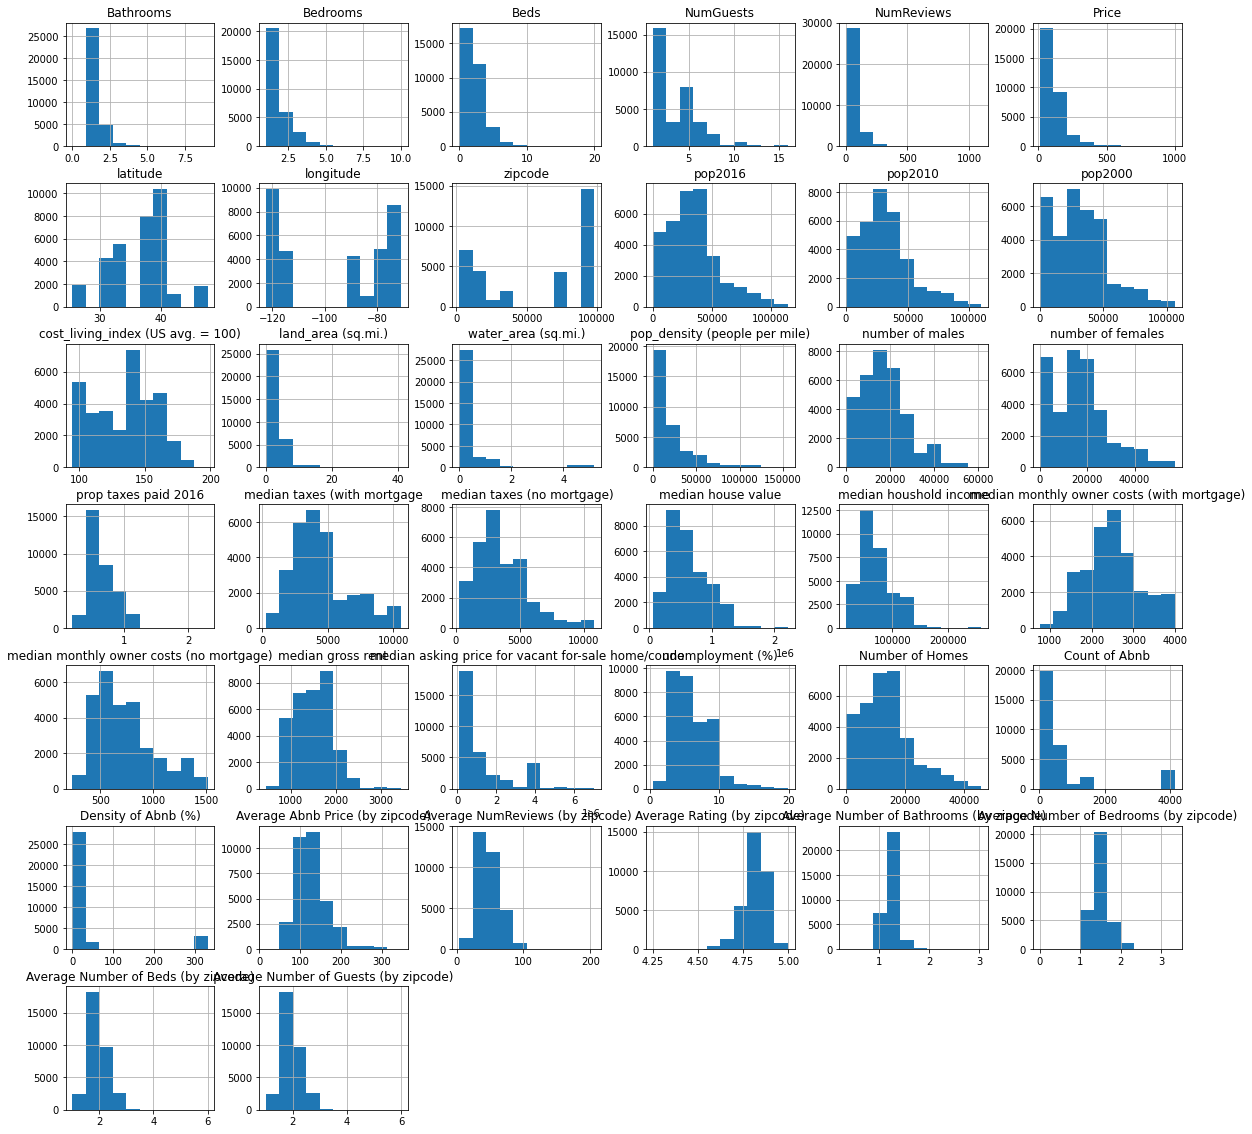

In [ ]:
df.hist(figsize=(20,20))



---

### TODO for Task 2

**Task 2: Data quality check, does duplicate entries exit in this table? Do they have consistent values? Briefely explain your methodology and your findings within this markdown cell, and write corresponding code in the next code cell.**


In [ ]:
# any duplicate records?
# use the DataFrame.duplicated() method to return a series of boolean values
df.duplicated().value_counts()

False    28891
True      4254
dtype: int64

In [ ]:
#check duplicates in specific columns
df.duplicated(subset=['Bathrooms','Bedrooms']).any()

True

In [ ]:
# your code goes here
print('There are', df.duplicated().sum(), 'duplicate rows.')
#find how many duplicates in specific columns
print('There are', df.duplicated('Bathrooms').sum(), 'duplicate Bathrooms.')
print('There are', df.duplicated('Rating').sum(), 'duplicate Rating.')
print('There are', df.duplicated('latitude').sum(), 'duplicate NumGuests.')

There are 4254 duplicate rows.
There are 33134 duplicate Bathrooms.
There are 33143 duplicate Rating.
There are 8514 duplicate NumGuests.


In [ ]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = df[df.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
duplicateRowsDF

Duplicate Rows except first occurrence based on all columns are :


,Bathrooms,Bedrooms,Beds,LocationName,NumGuests,NumReviews,Price,Rating,latitude,longitude,...,Number of Homes,Count of Abnb,Density of Abnb (%),Average Abnb Price (by zipcode),Average NumReviews (by zipcode),Average Rating (by zipcode),Average Number of Bathrooms (by zipcode),Average Number of Bedrooms (by zipcode),Average Number of Beds (by zipcode),Average Number of Guests (by zipcode)
4815,1.0,1.0,1.0,New Orleans,2.0,89.0,120.0,Y,29.96457,-90.05337,...,4704.4,703,14.943457,94.171920,83.967239,4.823668,1.211127,1.524242,2.066856,2.066856
4818,1.0,NaN,1.0,New Orleans,2.0,39.0,70.0,N,29.95745,-90.06990,...,1115.2,562,50.394548,91.775986,42.848077,4.769981,1.227758,1.337838,1.989324,1.989324
4820,2.0,2.0,3.0,New Orleans,8.0,81.0,60.0,N,29.95404,-90.07364,...,1115.2,562,50.394548,91.775986,42.848077,4.769981,1.227758,1.337838,1.989324,1.989324
4821,1.0,NaN,1.0,New Orleans,2.0,56.0,95.0,Y,29.97018,-90.09818,...,14967.6,829,5.538630,109.845499,49.687906,4.878179,1.249698,1.848285,2.343788,2.343788
4822,2.0,2.0,4.0,New Orleans,8.0,4.0,100.0,N,29.95312,-90.07124,...,1115.2,562,50.394548,91.775986,42.848077,4.769981,1.227758,1.337838,1.989324,1.989324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33129,1.0,2.0,2.0,Washington,6.0,17.0,60.0,N,38.87294,-76.97248,...,22297.2,227,1.018065,145.340708,27.687500,4.650000,1.367257,1.681818,2.756637,2.756637
33130,1.0,1.0,1.0,Arlington,4.0,46.0,89.0,Y,38.89807,-77.08786,...,10717.2,1265,11.803456,168.866129,31.233509,4.787722,1.254358,1.434460,1.716996,1.716996
33131,1.0,1.0,1.0,Washington,3.0,32.0,89.0,Y,38.88014,-76.98379,...,11794.8,410,3.476108,127.748768,54.344444,4.900289,1.196078,1.442708,2.487805,2.487805
33137,1.0,3.0,4.0,Arlington,6.0,18.0,130.0,Y,38.89802,-77.10512,...,10717.2,1265,11.803456,168.866129,31.233509,4.787722,1.254358,1.434460,1.716996,1.716996


In [ ]:
# Select duplicate rows except last occurrence based on all columns
duplicateRowsDF = df[df.duplicated(keep='last')]
print("Duplicate Rows except last occurrence based on all columns are :")
duplicateRowsDF

Duplicate Rows except last occurrence based on all columns are :


,Bathrooms,Bedrooms,Beds,LocationName,NumGuests,NumReviews,Price,Rating,latitude,longitude,...,Number of Homes,Count of Abnb,Density of Abnb (%),Average Abnb Price (by zipcode),Average NumReviews (by zipcode),Average Rating (by zipcode),Average Number of Bathrooms (by zipcode),Average Number of Bedrooms (by zipcode),Average Number of Beds (by zipcode),Average Number of Guests (by zipcode)
3898,2.0,3.0,3.0,New Orleans,6.0,81.0,99.0,Y,30.00515,-90.05561,...,14921.2,494,3.310726,117.917355,38.602771,4.911330,1.374745,2.138004,2.684211,2.684211
3901,1.0,1.0,2.0,New Orleans,4.0,101.0,95.0,Y,29.92741,-90.07686,...,5702.4,283,4.962823,100.185053,60.996283,4.871269,1.219081,1.498113,1.982332,1.982332
3902,2.0,3.0,3.0,New Orleans,8.0,7.0,113.0,Y,29.99367,-90.06420,...,14921.2,494,3.310726,117.917355,38.602771,4.911330,1.374745,2.138004,2.684211,2.684211
3904,1.0,1.0,1.0,New Orleans,2.0,89.0,120.0,Y,29.96457,-90.05337,...,4704.4,703,14.943457,94.171920,83.967239,4.823668,1.211127,1.524242,2.066856,2.066856
3905,2.0,2.0,3.0,New Orleans,8.0,81.0,60.0,N,29.95404,-90.07364,...,1115.2,562,50.394548,91.775986,42.848077,4.769981,1.227758,1.337838,1.989324,1.989324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32036,1.0,1.0,2.0,Washington,4.0,8.0,51.0,N,38.87451,-76.96333,...,22297.2,227,1.018065,145.340708,27.687500,4.650000,1.367257,1.681818,2.756637,2.756637
32038,2.0,1.0,8.0,Arlington,10.0,6.0,385.0,N,38.86946,-77.08480,...,6201.6,419,6.756321,153.592233,38.372822,4.766537,1.215827,1.425000,1.894988,1.894988
32040,1.0,1.0,1.0,Arlington,2.0,19.0,85.0,Y,38.86773,-77.08562,...,6201.6,419,6.756321,153.592233,38.372822,4.766537,1.215827,1.425000,1.894988,1.894988
32041,1.0,1.0,1.0,Arlington,4.0,57.0,79.0,Y,38.87062,-77.08825,...,10717.2,1265,11.803456,168.866129,31.233509,4.787722,1.254358,1.434460,1.716996,1.716996


In [ ]:
# Select all duplicate rows based on one column
duplicateRowsDF = df[df.duplicated(['NumGuests'])]
print("Duplicate Rows based on a single column are:")
duplicateRowsDF.head(6)

Duplicate Rows based on a single column are:


,Bathrooms,Bedrooms,Beds,LocationName,NumGuests,NumReviews,Price,Rating,latitude,longitude,...,Number of Homes,Count of Abnb,Density of Abnb (%),Average Abnb Price (by zipcode),Average NumReviews (by zipcode),Average Rating (by zipcode),Average Number of Bathrooms (by zipcode),Average Number of Bedrooms (by zipcode),Average Number of Beds (by zipcode),Average Number of Guests (by zipcode)
1,1.0,1.0,1.0,Atlanta,2.0,15.0,38.0,N,33.82613,-84.33963,...,10537.2,96,0.911058,103.673684,21.169231,4.847458,1.281250,1.473118,1.687500,1.687500
3,1.0,1.0,1.0,Atlanta,2.0,304.0,78.0,Y,33.77059,-84.33538,...,7808.0,130,1.664959,119.914729,44.063158,4.892857,1.292308,1.603306,1.953846,1.953846
4,1.0,1.0,1.0,Atlanta,2.0,19.0,50.0,Y,33.79030,-84.40027,...,9343.6,190,2.033477,131.058511,28.444444,4.881679,1.326316,1.580838,1.968421,1.968421
5,1.0,1.0,1.0,Atlanta,2.0,42.0,69.0,Y,33.77552,-84.36467,...,6912.0,210,3.038194,141.428571,36.273292,4.880795,1.285714,1.494681,1.933333,1.933333
6,1.0,1.0,1.0,Atlanta,2.0,21.0,300.0,N,33.77866,-84.38394,...,6912.0,210,3.038194,141.428571,36.273292,4.880795,1.285714,1.494681,1.933333,1.933333
7,1.0,1.0,1.0,Atlanta,2.0,40.0,95.0,Y,33.79274,-84.38750,...,9343.6,190,2.033477,131.058511,28.444444,4.881679,1.326316,1.580838,1.968421,1.968421


In [ ]:
# df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().value_counts()

False    28891
True      4254
dtype: int64

 * **Do they have consistent values?**

 `Yes, they have consistent values` 

* **Briefely explain your methodology and your findings?**

`I used the DataFrame.duplicated() method to return a series of boolean values ,if exist return true ,if not exist return false ,I found .it return true`

`I used the Dataframe.duplicated().sum() method to return (how many rows have duplicated)all rows that were duplicated and i found ,it return  4254 duplicate rows` 

`Select duplicate rows except first occurrence based on all columns method` 

`Select all duplicate rows based on one column method`

`Select duplicate rows except last occurrence based on all columns method`







---


**Task 3: Data quality check, write code and answer:
3.1 does missing value exit in the table? 
3.2 Where are the missing data? 
3.3 How much data is missing?
3.4 Are there any variables often missing together**
**You can use missingno library to generate plots to support your claim**
**Summarize your findings for task 3 in this markdown cell and write**
**corresponding code in the next code cell.**

In [ ]:
# summary of the number of nulls
df.isna().sum()

Bathrooms                                              448
Bedrooms                                              3327
Beds                                                   314
LocationName                                           319
NumGuests                                              314
NumReviews                                             316
Price                                                  638
Rating                                                   0
latitude                                                 0
longitude                                                0
zipcode                                                  0
pop2016                                                 42
pop2010                                                 42
pop2000                                                  0
cost_living_index (US avg. = 100)                       42
land_area (sq.mi.)                                       0
water_area (sq.mi.)                                     

In [ ]:
# find num of missing value in specific column
print("There are", df['Bathrooms'].isnull().sum(), "missing values in the column 'Bathrooms'")

There are 448 missing values in the column 'Bathrooms'


In [ ]:
print(df['Bathrooms'].value_counts())

1.0    26736
2.0     4859
3.0      735
4.0      172
0.0      127
5.0       42
8.0       18
7.0        4
6.0        3
9.0        1
Name: Bathrooms, dtype: int64


In [ ]:
missing_data = df.isnull()

In [ ]:
print('\nValue counts for missing data in Bathrooms:\n')
print( missing_data['Bathrooms'].value_counts())


Value counts for missing data in Bathrooms:

False    32697
True       448
Name: Bathrooms, dtype: int64


In [ ]:
# you can also easily find the records containing missing values for a specific attribute, for instance
df[df['Bathrooms'].isnull()]

,Bathrooms,Bedrooms,Beds,LocationName,NumGuests,NumReviews,Price,Rating,latitude,longitude,...,Number of Homes,Count of Abnb,Density of Abnb (%),Average Abnb Price (by zipcode),Average NumReviews (by zipcode),Average Rating (by zipcode),Average Number of Bathrooms (by zipcode),Average Number of Bedrooms (by zipcode),Average Number of Beds (by zipcode),Average Number of Guests (by zipcode)
82,NaN,1.0,1.0,Atlanta,2.0,58.0,78.0,Y,33.76581,-84.32007,...,5306.0,75,1.413494,104.743243,35.280702,4.944444,1.459459,1.845070,2.146667,2.146667
1338,NaN,1.0,1.0,Newtonville,2.0,130.0,55.0,Y,42.35015,-71.20780,...,8945.6,93,1.039617,130.010870,34.955882,4.782258,1.293478,1.615385,2.129032,2.129032
1378,NaN,1.0,1.0,Boston,1.0,269.0,140.0,N,42.34496,-71.07486,...,9333.2,35,0.375005,151.828571,76.375000,4.800000,1.060606,1.153846,1.400000,1.400000
1546,NaN,1.0,1.0,Boston,1.0,258.0,99.0,N,42.34643,-71.07503,...,9333.2,35,0.375005,151.828571,76.375000,4.800000,1.060606,1.153846,1.400000,1.400000
1576,NaN,1.0,1.0,Boston,1.0,20.0,40.0,N,42.28480,-71.13935,...,13169.6,71,0.539120,105.529412,34.982143,4.896226,1.300000,1.594203,2.140845,2.140845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31606,NaN,1.0,1.0,"Washington, D.C.",2.0,180.0,62.0,Y,38.96094,-77.08446,...,6622.8,29,0.437881,111.607143,64.000000,4.976190,1.285714,1.538462,1.827586,1.827586
32198,NaN,1.0,1.0,Arlington,2.0,13.0,80.0,N,38.85574,-77.08831,...,6201.6,419,6.756321,153.592233,38.372822,4.766537,1.215827,1.425000,1.894988,1.894988
32362,NaN,1.0,1.0,Washington,1.0,33.0,99.0,N,38.90357,-77.02705,...,5300.0,123,2.320755,135.268293,52.009174,4.800000,1.262295,1.453704,2.203252,2.203252
32735,NaN,1.0,1.0,Arlington,1.0,70.0,55.0,Y,38.84913,-77.10821,...,10717.2,1265,11.803456,168.866129,31.233509,4.787722,1.254358,1.434460,1.716996,1.716996


In [ ]:
# TODO for Task 3
# you can also count the ratio of missing values
total_miss = df.isnull().sum()
percent_miss = (total_miss/df.isnull().count()*100)

In [ ]:
# sort attributes by missing value ratio
missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':percent_miss})
missing_data.sort_values(by='Total missing',ascending=False)

,Total missing,% missing
median taxes (with mortgage,3621,10.924725
median taxes (no mortgage),3527,10.641122
median monthly owner costs (no mortgage),3494,10.541560
median monthly owner costs (with mortgage),3361,10.140293
median house value,3333,10.055815
Bedrooms,3327,10.037713
Price,638,1.924876
Bathrooms,448,1.351637
LocationName,319,0.962438
NumReviews,316,0.953387


`From the above output, we can see that there are 22 columns [ ]having missing values.`

In [ ]:
# Count total NaN at each row in DataFrame
# for i in range(len(df.index)) :
#     print("Nan in row ", i , " : " ,  df.iloc[i].isnull().sum())

Streaming output truncated to the last 5000 lines.
Nan in row  28145  :  0
Nan in row  28146  :  0
Nan in row  28147  :  0
Nan in row  28148  :  1
Nan in row  28149  :  1
Nan in row  28150  :  1
Nan in row  28151  :  0
Nan in row  28152  :  1
Nan in row  28153  :  0
Nan in row  28154  :  0
Nan in row  28155  :  0
Nan in row  28156  :  0
Nan in row  28157  :  0
Nan in row  28158  :  0
Nan in row  28159  :  4
Nan in row  28160  :  0
Nan in row  28161  :  0
Nan in row  28162  :  0
Nan in row  28163  :  1
Nan in row  28164  :  0
Nan in row  28165  :  0
Nan in row  28166  :  0
Nan in row  28167  :  0
Nan in row  28168  :  0
Nan in row  28169  :  0
Nan in row  28170  :  15
Nan in row  28171  :  0
Nan in row  28172  :  0
Nan in row  28173  :  0
Nan in row  28174  :  0
Nan in row  28175  :  0
Nan in row  28176  :  0
Nan in row  28177  :  1
Nan in row  28178  :  0
Nan in row  28179  :  1
Nan in row  28180  :  0
Nan in row  28181  :  0
Nan in row  28182  :  0
Nan in row  28183  :  1
Nan in row  

**3.1 does missing value exit in the table?**

`YES`

**3.2 Where are the missing data?**

`there are the missing data In 22 features[median taxes (with mortgage,median taxes (no mortgage),median monthly owner costs (no mortgage),
median monthly owner costs (with mortgage),median house value,Bedrooms,Price,Bathrooms,LocationName,NumReviews,Beds,NumGuests,median gross rent,median asking price for vacant for-sale home/condo,unemployment (%),prop taxes paid 2016,median houshold income,Number of Homes,cost_living_index (US avg. = 100),pop2010,pop2016,Density of Abnb (%)]` 

**How much data is missing?**

`from code above i found the max percent of missing is 10% 
 and the Min is 0.126716%`




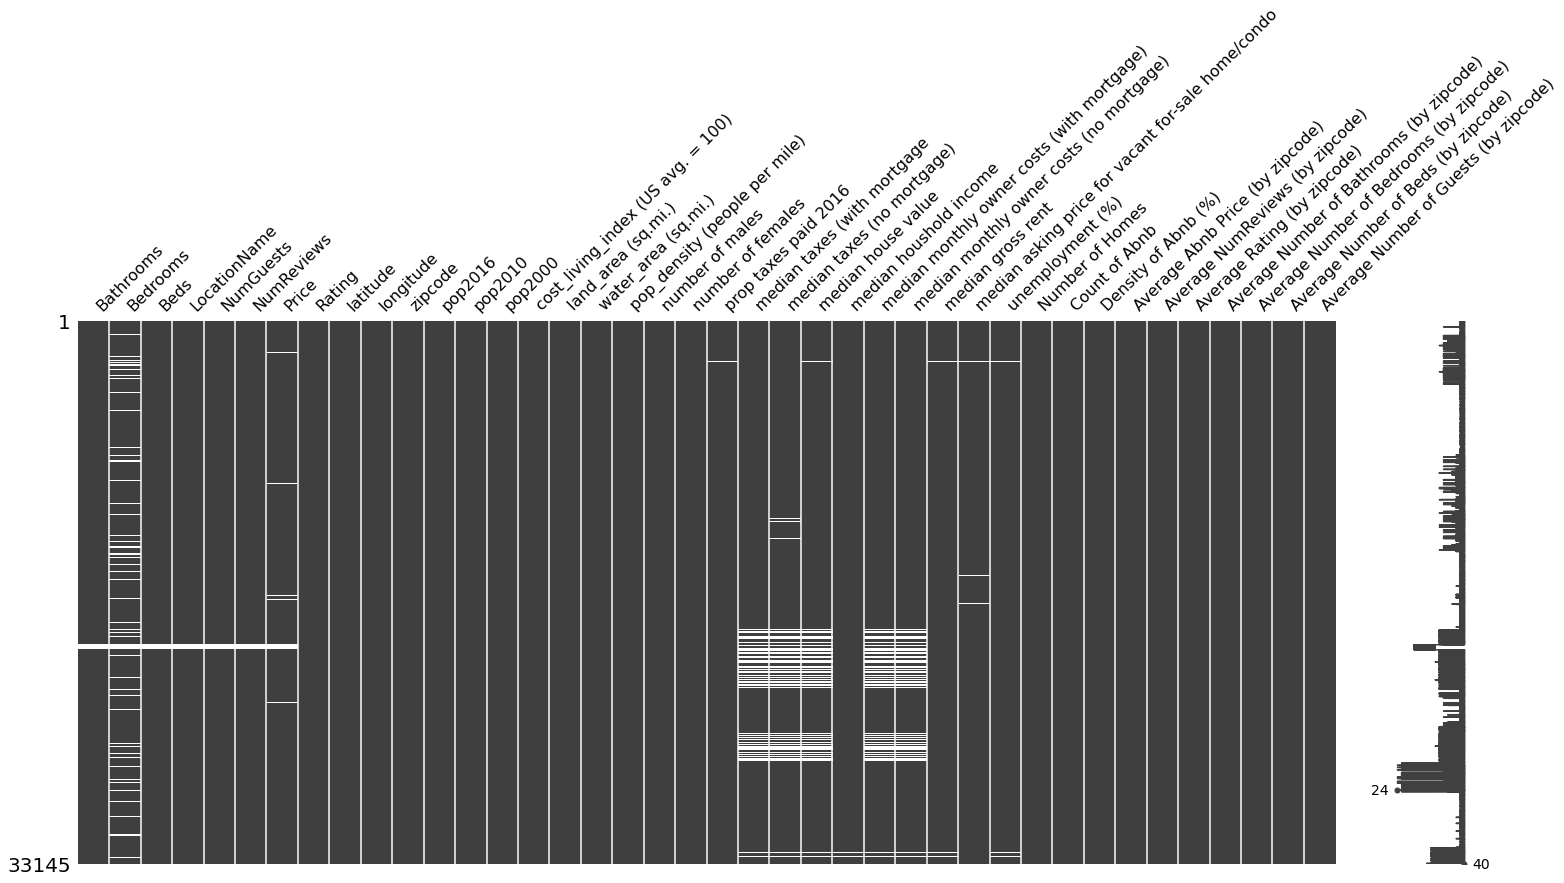

In [ ]:
#visualize missing values as a matrix
msno.matrix(df)

**3.4 Are there any variables often missing together You can use missingno**

`Yes there are some variables often missing together`

`from the matrix plot , as we see ,there are pattern in missing values this mean that this features often missing together such as [median taxes (with mortgage,median taxes (no mortgage),median monthly owner costs (no mortgage),
median monthly owner costs (with mortgage),median house value]`





---


# TODO for Task 4

**Task 4: What are the potential mechnisms of the missing values? Briefely explain your methodology and your findings (within this markdown cell), and write corresponding code in the next code cell**.

In [ ]:
#Find the total number of missing values from the entire dataset
df.isnull().sum().sum() 

23766

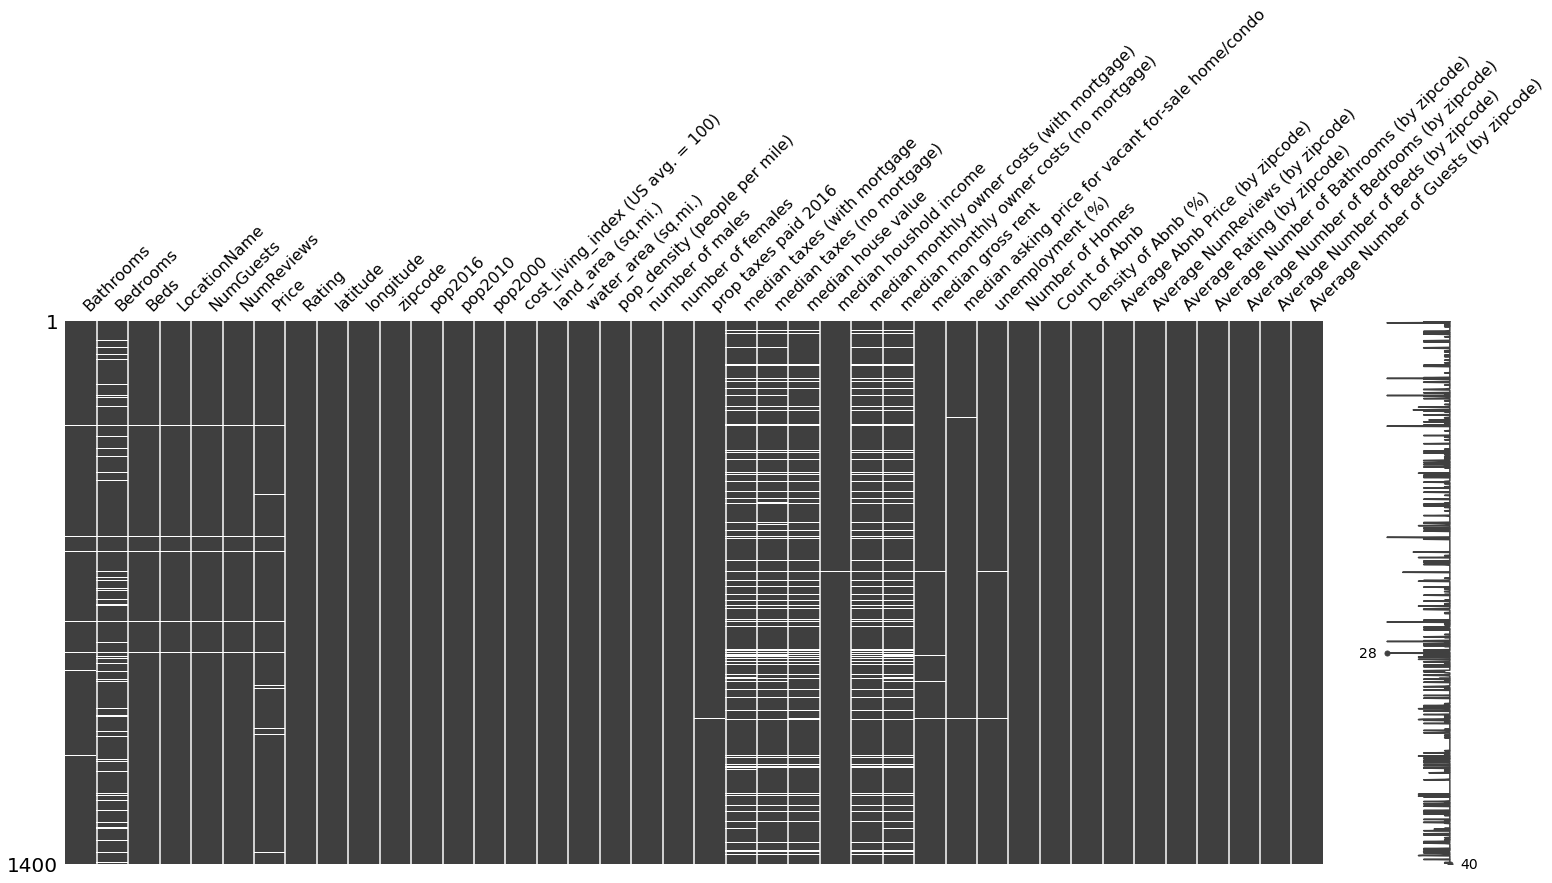

In [ ]:
#visualize missing values as a matrix
msno.matrix(df.sample(1400))

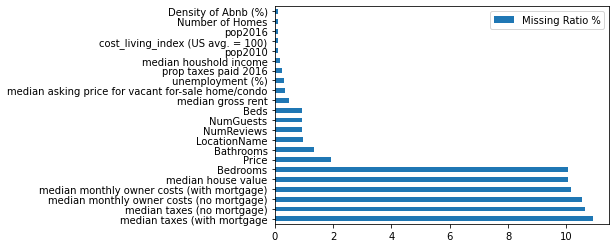

In [ ]:
import matplotlib.pyplot as plt
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')
plot_nas(df)

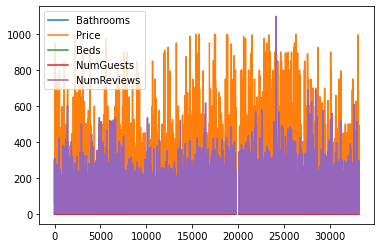

In [ ]:
df[['Bathrooms', 'Price','Beds','NumGuests','NumReviews']].plot()
plt.show()

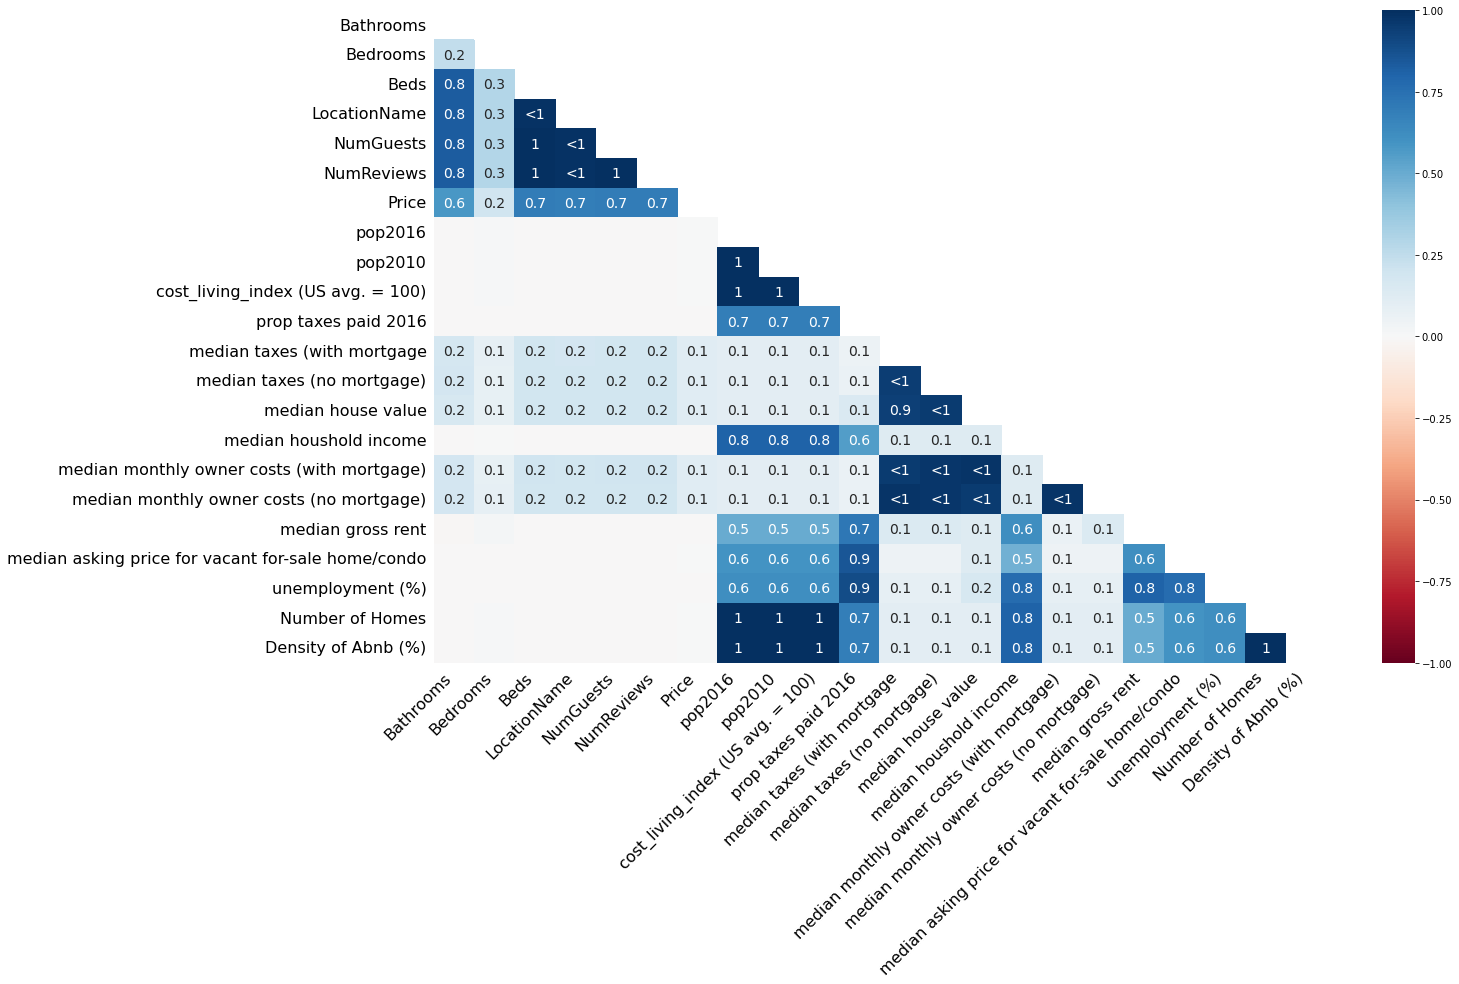

In [ ]:
#heapmap for correlation analysis
msno.heatmap(df)

**from this visualization I notice some notes:**
  * `Bathrooms ,Beds,LocationName,NumGuests,NumReviews and price consider MNAR because the missing in these columns  occur together in specific events ,and as we see in corr-matrix they have 0.8 and 1 values this means that they depend on each other`  

  * `Bedrooms ,the missing in this column is MCAR because it has missing values not related with any feature in data ,so the missing is completly random`

  * `median taxes (with mortgage,median taxes (no mortgage),median house value,median monthly owner costs (no mortgage),median monthly owner costs (with mortgage) ,the type of missing  in these columns are MAR because there is a pattern in missing data, this means that the missing values are related together`

  * `Density of Abnb (%) has strong corr with pop2016 ,pop2010,cost_living_index (US avg. = 100),Number of Homes  so they are MAR`



  
      

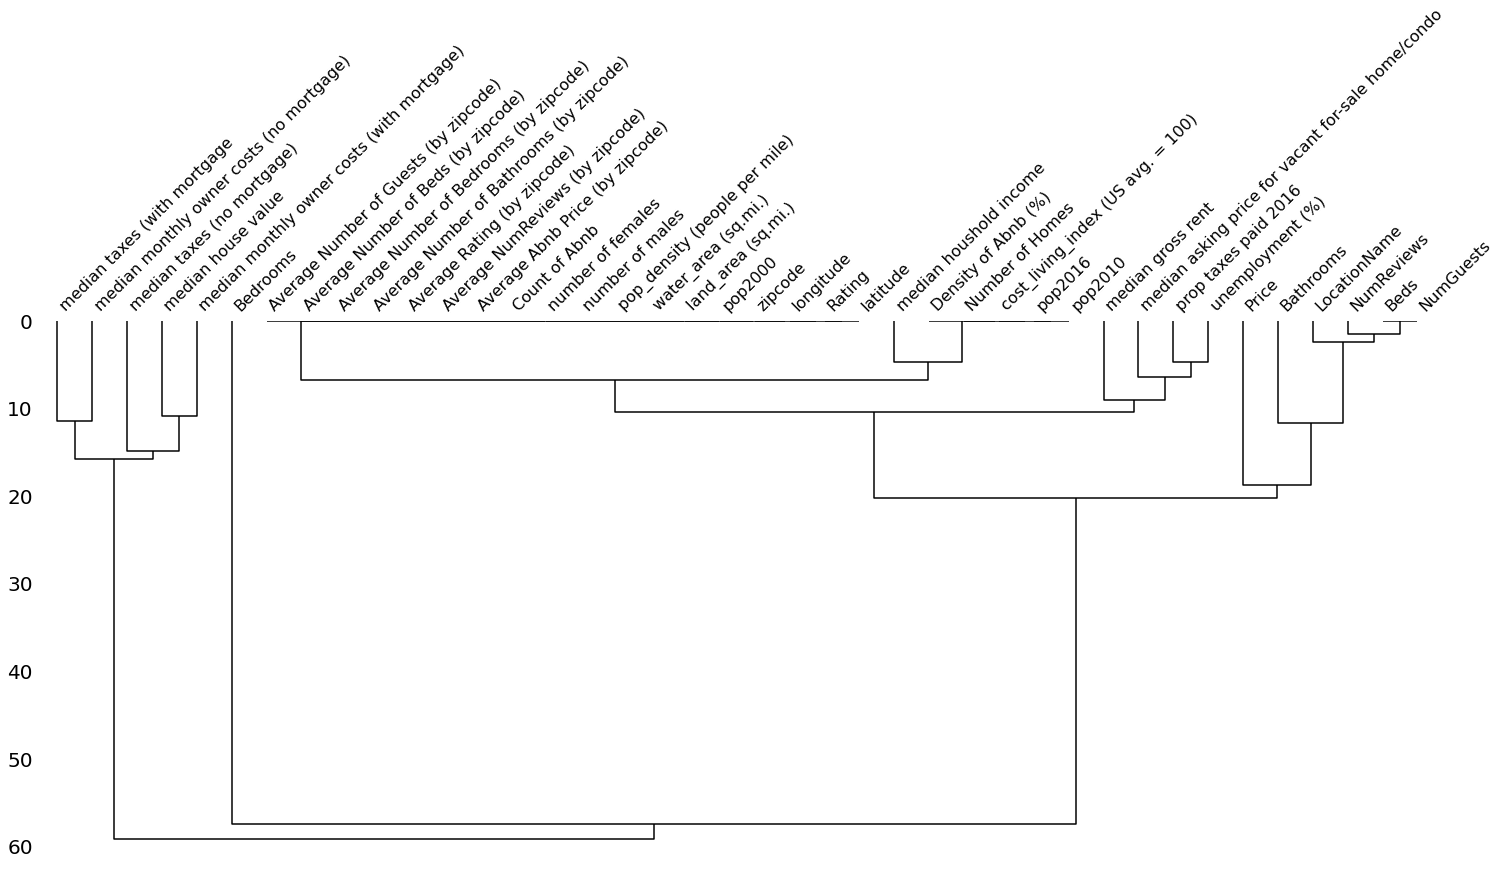

In [ ]:
#dendrogram plot
msno.dendrogram(df)

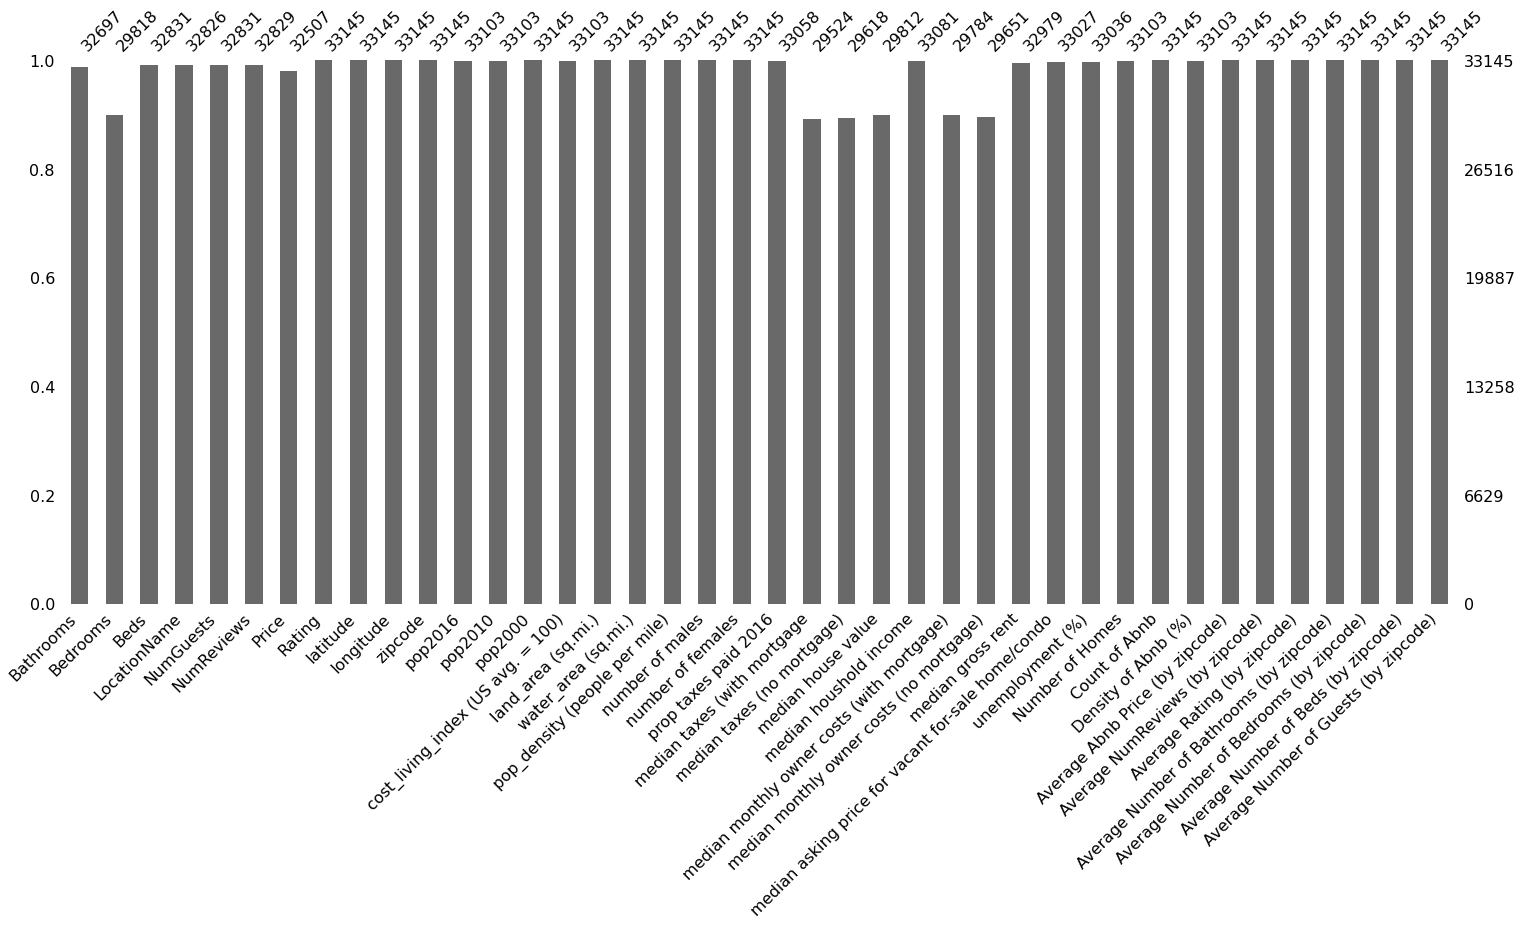

In [ ]:
msno.bar(df)

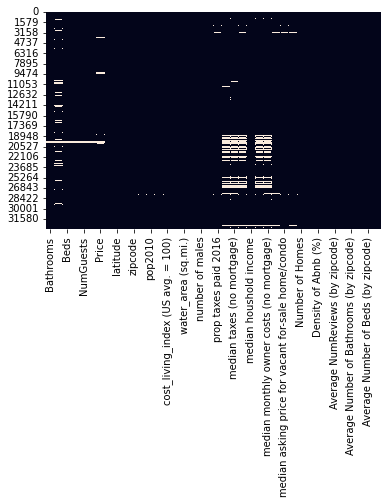

In [ ]:
sns.heatmap(df.isnull(), cbar=False)



---


**Task 5: Handling missing values, Briefely explain your methodology below (within this markdown cell), and write corresponding code in the next code cell**.


`
from visualization above I found that 
some of data is MCAR or MAR or MNAR
`

`this means that there are different ways to handle these cases 
if the missing data is MCAR,the mechanism to handle it is the deletion of columns and row`

`if the missing data is MAR ,the mechanism to handle it is imputation (single or multiple `

 `if the missing data is MNAR ,the mechanism to handle it is improve and sensitize (find data or best/worst case )`
 



 


`If the missing value is of the type Missing Not At Random (MNAR), then it should not be deleted.`

`If the missing value is of type Missing At Random (MAR) or Missing Completely At Random (MCAR) then it can be deleted`

**because we have few missing data ,we shouldn't delete it 
so I will use Imputing the Missing Value method**

We have numerical and categorical

In [ ]:
#Replacing With Mean
#Replace the missing values for numerical columns with mean
df['median taxes (with mortgage'] = df['median taxes (with mortgage'].fillna(df['median taxes (with mortgage'].mean())
df['median taxes (no mortgage)'] = df['median taxes (no mortgage)'].fillna(df['median taxes (no mortgage)'].mean())
df['median monthly owner costs (no mortgage)'] = df['median monthly owner costs (no mortgage)'].fillna(df['median monthly owner costs (no mortgage)'].mean())
df['median monthly owner costs (with mortgage)'] = df['median monthly owner costs (with mortgage)'].fillna(df['median monthly owner costs (with mortgage)'].mean())
df['median house value'] = df['median house value'].fillna(df['median house value'].mean())
df['Bedrooms'] = df['Bedrooms'].fillna(df['Bedrooms'].mean())
df['Price'] = df['Price'].fillna(df['Price'].mean())
df['Bathrooms'] = df['Bathrooms'].fillna(df['Bathrooms'].mean())
df['NumReviews'] = df['NumReviews'].fillna(df['NumReviews'].mean())
df['Beds'] = df['Beds'].fillna(df['Beds'].mean())
df['NumGuests'] = df['NumGuests'].fillna(df['NumGuests'].mean())
df['median gross rent'] = df['median gross rent'].fillna(df['median gross rent'].mean())
df['median asking price for vacant for-sale home/condo'] = df['median asking price for vacant for-sale home/condo'].fillna(df['median asking price for vacant for-sale home/condo'].mean())
df['unemployment (%)'] = df['unemployment (%)'].fillna(df['unemployment (%)'].mean())
df['prop taxes paid 2016'] = df['prop taxes paid 2016'].fillna(df['prop taxes paid 2016'].mean())
df['median houshold income'] = df['median houshold income'].fillna(df['median houshold income'].mean())
df['Number of Homes'] = df['Number of Homes'].fillna(df['Number of Homes'].mean())
df['cost_living_index (US avg. = 100)'] = df['cost_living_index (US avg. = 100)'].fillna(df['cost_living_index (US avg. = 100)'].mean())
df['pop2010'] = df['pop2010'].fillna(df['pop2010'].mean())
df['pop2016'] = df['pop2016'].fillna(df['pop2016'].mean())
df['Density of Abnb (%)'] = df['Density of Abnb (%)'].fillna(df['Density of Abnb (%)'].mean())

In [ ]:
#Replace the missing values for categorical columns with mode
df['LocationName'] = df['LocationName'].fillna(df['LocationName'].mode()[0])

In [ ]:
#check null value
df.isnull().sum()

Bathrooms                                             0
Bedrooms                                              0
Beds                                                  0
LocationName                                          0
NumGuests                                             0
NumReviews                                            0
Price                                                 0
Rating                                                0
latitude                                              0
longitude                                             0
zipcode                                               0
pop2016                                               0
pop2010                                               0
pop2000                                               0
cost_living_index (US avg. = 100)                     0
land_area (sq.mi.)                                    0
water_area (sq.mi.)                                   0
pop_density (people per mile)                   

In [ ]:
df['LocationName'] =df['LocationName'].astype('category').cat.codes

In [ ]:
df

,Bathrooms,Bedrooms,Beds,LocationName,NumGuests,NumReviews,Price,Rating,latitude,longitude,...,Number of Homes,Count of Abnb,Density of Abnb (%),Average Abnb Price (by zipcode),Average NumReviews (by zipcode),Average Rating (by zipcode),Average Number of Bathrooms (by zipcode),Average Number of Bedrooms (by zipcode),Average Number of Beds (by zipcode),Average Number of Guests (by zipcode)
0,1.0,1.0,1.0,15,2.0,7.0,38.0,Y,33.75515,-84.32992,...,5306.0,75,1.413494,104.743243,35.280702,4.944444,1.459459,1.845070,2.146667,2.146667
1,1.0,1.0,1.0,15,2.0,15.0,38.0,N,33.82613,-84.33963,...,10537.2,96,0.911058,103.673684,21.169231,4.847458,1.281250,1.473118,1.687500,1.687500
2,2.0,2.0,2.0,15,4.0,17.0,100.0,Y,33.75076,-84.37058,...,9114.4,200,2.194330,119.368687,40.400000,4.937500,1.375000,1.602094,1.925000,1.925000
3,1.0,1.0,1.0,15,2.0,304.0,78.0,Y,33.77059,-84.33538,...,7808.0,130,1.664959,119.914729,44.063158,4.892857,1.292308,1.603306,1.953846,1.953846
4,1.0,1.0,1.0,15,2.0,19.0,50.0,Y,33.79030,-84.40027,...,9343.6,190,2.033477,131.058511,28.444444,4.881679,1.326316,1.580838,1.968421,1.968421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33140,1.0,1.0,2.0,254,5.0,159.0,67.0,N,38.90956,-77.03107,...,5300.0,123,2.320755,135.268293,52.009174,4.800000,1.262295,1.453704,2.203252,2.203252
33141,2.0,1.0,4.0,254,1.0,28.0,49.0,Y,38.90920,-77.02622,...,5300.0,123,2.320755,135.268293,52.009174,4.800000,1.262295,1.453704,2.203252,2.203252
33142,1.0,1.0,1.0,254,2.0,106.0,120.0,Y,38.88746,-76.99119,...,11794.8,410,3.476108,127.748768,54.344444,4.900289,1.196078,1.442708,2.487805,2.487805
33143,1.0,1.0,2.0,254,3.0,296.0,70.0,Y,38.88535,-76.98183,...,11794.8,410,3.476108,127.748768,54.344444,4.900289,1.196078,1.442708,2.487805,2.487805


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f11823a0b90>]],
      dtype=object)

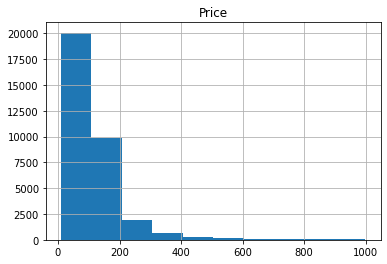

In [ ]:
# plot the histogram summary for Age attribute
df.hist(column='Price')

**Task 6: Impact on classification performance. Consider one of the above handling method you proposed for this dataset and perform classification tast to investigate if your handling method can improve classificaiton performance.**

**Train-test split: you can do one split of train and test where 70% of the data for training and the remaining 30% for testing. 
Classifier: you can pick any two tranditional binary classifier (e.g., from sklearn)**

In [ ]:
# TODO for Task 6
# X=df.drop('Rating',axis=1)#split data  into X and y
# y=df['Rating']#label

In [ ]:
#train test split 
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(df, test_size=0.30, random_state=42)

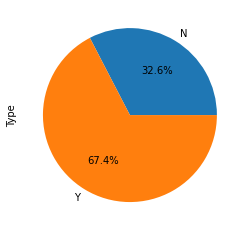

In [ ]:
#check balanced of data 
train_set.groupby('Rating').size().plot(kind='pie',
                                       y = train_set['Rating'],
                                       label = "Type",
                                       autopct='%1.1f%%')

In [ ]:
train_set['Rating'].value_counts()

Y    15634
N     7567
Name: Rating, dtype: int64

In [ ]:
X_train=train_set.drop('Rating',axis=1)#split data  into X and y
y_train=train_set['Rating']#label

In [ ]:
from sklearn.utils import resample

resampling = X_train.copy()
resampling['Rating'] = y_train.values
class_Y = resampling[resampling['Rating']=='Y']
class_N = resampling[resampling['Rating']=='N']
class_N_after = resample(class_N, replace=True,n_samples=15634)
df_upsampled = pd.concat([class_Y, class_N_after])

In [ ]:
# Display new class counts
df_upsampled['Rating'].value_counts()

Y    15634
N    15634
Name: Rating, dtype: int64

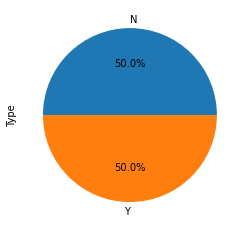

In [ ]:
#check balanced of data 
df_upsampled.groupby('Rating').size().plot(kind='pie',
                                       y = df_upsampled['Rating'],
                                       label = "Type",
                                       autopct='%1.1f%%')

Upsampling not good in this case so I will use the origina data set for training model

In [ ]:
training_set=train_set

In [ ]:
X_train=training_set.drop('Rating',axis=1)
y_train=training_set['Rating']#label

In [ ]:
X_test=test_set.drop('Rating',axis=1)
y_test=test_set['Rating']#label

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)

In [ ]:
X_train = scaler.transform(X_train)

In [ ]:
X_test= scaler.transform(X_test)

In [ ]:
# creating instance of labelencoder
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y_train=labelencoder.fit_transform(y_train)
y_test=labelencoder.fit_transform(y_test)

In [ ]:
#Import svm model
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators= 500, min_samples_split= 3, min_samples_leaf= 1, max_features= 'sqrt')

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(max_features='sqrt', min_samples_split=3,
                       n_estimators=500)

In [ ]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)

In [ ]:
from sklearn import metrics 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
print("f1_score OF THE MODEL: ", metrics.f1_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.7567377312952535
f1_score OF THE MODEL:  0.8333677757112351


**Task 7: Report your findings through the above experiments (in this markdown cell)**

`In this experiment ,we have 3 type of missing data or why this data missed ,MCAR,MAR,MNAR`

`i used Imputation by mean and mode to handle the missing values 
`

`the data is unpalanced put when I tried to resample it I found accuracy was decreased so I interst in f1-score instead accuracy `

`then I split data to train test and using randomforest classifier `

`the result is 75 acc - 83 f1-score`



`INTRO:`

Missing data can skew anything for data scientists, from economic analysis to clinical trials. After all, any analysis is only as good as the data. A data scientist doesn’t want to produce biased estimates that lead to invalid results. The concept of missing data is implied in the name: it’s data that is not captured for a variable for the observation in question. Missing data reduces the statistical power of the analysis, which can distort the validity of the results

**why the data is missing?**

`Missing at Random (MAR)`:
Missing at Random means the data is missing relative to the observed data. It is not related to the specific missing values. The data is not missing across all observations but only within sub-samples of the data

`Missing Completely at Random (MCAR)`: 
If the probability of being missing is the same for all cases, then the data are said to be missing completely at random (MCAR). This effectively implies that causes of the missing data are unrelated to the data. We may consequently ignore many of the complexities that arise because data are missing, apart from the obvious loss of information.

`Missing Not at Random (MNAR)`:
The MNAR category applies when the missing data has a structure to it. In other words, there appear to be reasons the data is missing. In a survey– did not answer a question. Like MAR, the data cannot be determined by the observed data, because the missing information is unknown. Data scientists must model the missing data to develop an unbiased estimate. Simply removing observations with missing data could result in a model with bias

`Handling the missing data`

**Deletion**

`Listwise`
in this method, all data for an observation that has one or more missing values are deleted. The analysis is run only on observations that have a complete set of data. If the data set is small, it may be the most efficient method to eliminate those cases from the analysis. However, in most cases, the data are not missing completely at random (MCAR)

`Pairwise` deletion assumes data are missing completely at random (MCAR), but all the cases with data, even those with missing data,  are used in the analysis. Pairwise deletion allows data scientists to use more of the data. However, the resulting statistics may vary because they are based on different data sets. The results may be impossible to duplicate with a complete set of data.

`Dropping Variables`

If data is missing for more than 60% of the observations, it may be wise to discard it if the variable is insignificant.

**Imputation**

`Mean, Median and Mode`:
This is one of the most common methods of imputing values when dealing with missing data. In cases where there are a small number of missing observations, data scientists can calculate the mean or median of the existing observations. However, when there are many missing variables, mean or median results can result in a loss of variation in the data. This method does not use time-series characteristics or depend on the relationship between the variables


`REF:https://www.mastersindatascience.org/learning/how-to-deal-with-missing-data/`